In [1]:
import pandas as pd
import numpy as nm

#for Label Encoding
from sklearn.preprocessing import LabelEncoder

#for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for Data splitting
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Acer\Desktop\Machine Learning Models\Dataset\emails_db.csv')
df.shape

(5728, 2)

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.shape

(5728, 2)

In [5]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [6]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# DATA PRE-PROCESSING

In [7]:
df=df.drop_duplicates(keep='first')

#### Randomising Dataset

In [8]:
df = df.sample(frac = 1)

In [9]:
df

,text,spam
5367,"Subject: re : chapter 3 gentlemen , thankyou...",0
3940,Subject: this summer ' s houston visits richa...,0
2835,Subject: off duty days good morning all : mo...,0
3090,"Subject: re : energy derivatives hi vince , ...",0
1102,Subject: in the heart of your business ! corp...,1
...,...,...
1849,Subject: re : enron cover letter & resume for ...,0
4922,Subject: 1 candidate and 2 interns bryan ple...,0
4049,Subject: update on spring conference hello ev...,0
1887,Subject: hiring of wharton tiger teams members...,0


#### Word Count

In [10]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

,text,word_count
5367,"Subject: re : chapter 3 gentlemen , thankyou...",136
3940,Subject: this summer ' s houston visits richa...,429
2835,Subject: off duty days good morning all : mo...,113
3090,"Subject: re : energy derivatives hi vince , ...",65
1102,Subject: in the heart of your business ! corp...,247


In [11]:
df.word_count.describe()

count    5695.000000
mean      358.137313
std       452.047939
min         3.000000
25%       112.500000
50%       232.000000
75%       439.000000
max      8984.000000
Name: word_count, dtype: float64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

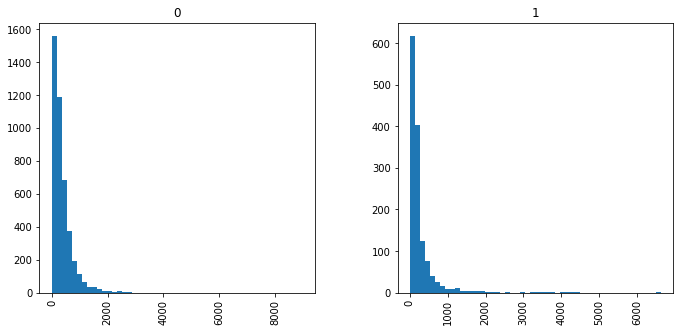

In [12]:
df.hist(column='word_count', by='spam', bins=50,figsize=(11,5))

# DATA CLEANING

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer("english")
porter_stemmer = PorterStemmer()

from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

stop_words=stopwords.words("english")

### Removing Punctuation Marks

In [14]:
import string
def dataClean(text):
    message = re.sub('[^a-zA-Z]',' ', text)
    message = message.split()
    return " ".join(message)

df['text'] = df['text'].apply(dataClean)
df.head(n = 10)

,text,spam,word_count
5367,Subject re chapter gentlemen thankyou for your...,0,136
3940,Subject this summer s houston visits richard h...,0,429
2835,Subject off duty days good morning all most of...,0,113
3090,Subject re energy derivatives hi vince thanks ...,0,65
1102,Subject in the heart of your business corporat...,1,247
3857,Subject exmar credit john bill bradford is on ...,0,29
3588,Subject d g energy software procurement laine ...,0,139
429,Subject save your money buy getting this thing...,1,104
3696,Subject re reminder sandeep i am meeting jeff ...,0,282
2704,Subject re mscf speaker series pierre philippe...,0,175


### Converting to Lowercase

In [15]:
import string
def dataClean(text):
    message = text.lower()
    return message

df['text'] = df['text'].apply(dataClean)
df.head(n = 10)

,text,spam,word_count
5367,subject re chapter gentlemen thankyou for your...,0,136
3940,subject this summer s houston visits richard h...,0,429
2835,subject off duty days good morning all most of...,0,113
3090,subject re energy derivatives hi vince thanks ...,0,65
1102,subject in the heart of your business corporat...,1,247
3857,subject exmar credit john bill bradford is on ...,0,29
3588,subject d g energy software procurement laine ...,0,139
429,subject save your money buy getting this thing...,1,104
3696,subject re reminder sandeep i am meeting jeff ...,0,282
2704,subject re mscf speaker series pierre philippe...,0,175


### Stemming & Lemmatisation

In [16]:
import string
def dataClean(text):
    message = text.split()
    words = [snowball_stemmer.stem(word) for word in message if word not in stop_words]
    lem = WordNetLemmatizer()
    words = [lem.lemmatize(word) for word in message if not word in  stop_words]
    return " ".join(words)

df["text"] = df["text"].apply(dataClean)
df.head(n = 10)

,text,spam,word_count
5367,subject chapter gentleman thankyou fine effort...,0,136
3940,subject summer houston visit richard agreed pa...,0,429
2835,subject duty day good morning case please advi...,0,113
3090,subject energy derivative hi vince thanks call...,0,65
1102,subject heart business corporate image say lot...,1,247
3857,subject exmar credit john bill bradford vacati...,0,29
3588,subject g energy software procurement laine en...,0,139
429,subject save money buy getting thing tried cia...,1,104
3696,subject reminder sandeep meeting jeff tuesday ...,0,282
2704,subject mscf speaker series pierre philippe co...,0,175


# FEATURE EXTRACTION AND VECTORIZATION

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],df['spam'],test_size=0.2,random_state=57)

In [19]:
X_train

3816    subject charlie weldon forwarded mike robert h...
5080    subject turkey group message sent rac london r...
2087    subject risk panel discussion steve meeting fi...
2374    subject year end performance feedback note rec...
4706    subject propane price vince please find attach...
                              ...                        
4714    subject vacation shirley problem vince shirley...
3147    subject monday th september monday th septembe...
2234    subject organizational announcement introducin...
4373    subject jason sokolov removal ted murphy cost ...
2787    subject iafe membership dear colleague pleased...
Name: text, Length: 4556, dtype: object

In [20]:
from textblob import TextBlob 
def lemma_extraction(text):
    lemmas = TextBlob(text).words
    #returning only lemma for each word
    return [word.lemma for word in lemmas]

In [21]:
def features_transform(mail_text):
    #form bag of words using countvectorizer
    transformer = CountVectorizer(analyzer=lemma_extraction).fit(X_train)
    bag_of_words = transformer.transform(mail_text)
     
    #apply the TF-IDF transform to the output of BOW
    tfidf_transformer = TfidfTransformer().fit(bag_of_words)
    tfidf_texts = tfidf_transformer.transform(bag_of_words)
    
    #return result of transforms
    return tfidf_texts

In [22]:
X_train_features=features_transform(X_train)
X_test_features=features_transform(X_test)

sparse matrix shape: (4556, 27909)
number of non-zeros: 394014
sparsity: 0.31%


# MODEL TRAINING

In [23]:
def generate_accuracy_and_heatmap(model, x, y): # This is a multi label classification problem
    confusion_m = confusion_matrix(y,model.predict(x))
    sns.heatmap(confusion_m,annot=True,fmt="d")
    ac="{:.2f}".format(accuracy_score(y,model.predict(x))*100)
    print('Accuracy : ', ac,'%')
    print("Y axis : Actual Value.")
    print("X axis : Predicted Value.")
    return 1

## Multinomial Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train_features, Y_train)

MultinomialNB()

sparse matrix shape: (1139, 27909)
number of non-zeros: 99225
sparsity: 0.31%
Accuracy :  89.20 %
Y axis : Actual Value.
X axis : Predicted Value.


1

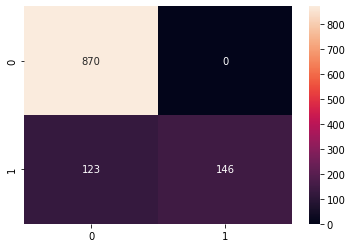

In [29]:
generate_accuracy_and_heatmap(clf_mnb, X_test_features, Y_test)

## Complement Naive Bayes

In [30]:
from sklearn.naive_bayes import ComplementNB
clf_cnb = ComplementNB()
clf_cnb.fit(X_train_features, Y_train)

ComplementNB()

Accuracy :  93.85 %
Y axis : Actual Value.
X axis : Predicted Value.


1

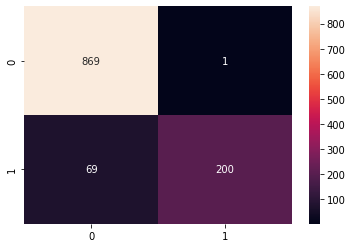

In [31]:
generate_accuracy_and_heatmap(clf_cnb, X_test_features, Y_test)

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf_DT=DecisionTreeClassifier(random_state=0 , max_depth=18)
clf_DT.fit(X_train_features, Y_train)

DecisionTreeClassifier(max_depth=18, random_state=0)

Accuracy :  94.91 %
Y axis : Actual Value.
X axis : Predicted Value.


1

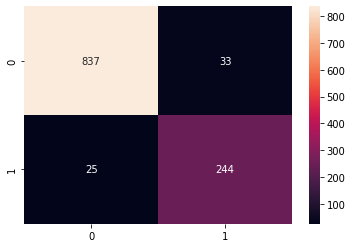

In [33]:
generate_accuracy_and_heatmap(clf_DT, X_test_features, Y_test)

## XGBoost Classifier

In [34]:
import xgboost as xgb
xgb_xgb = xgb.XGBClassifier()
xgb_xgb.fit(X_train_features, Y_train)

[21:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy :  98.07 %
Y axis : Actual Value.
X axis : Predicted Value.


1

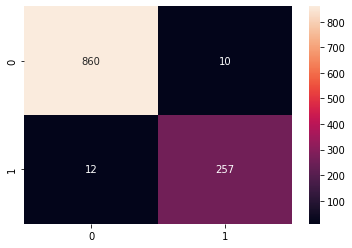

In [35]:
generate_accuracy_and_heatmap(xgb_xgb, X_test_features, Y_test)

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion='entropy', max_depth= 9, max_features= 'sqrt', n_estimators= 200)
clf_rf.fit(X_train_features, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       n_estimators=200)

Accuracy :  82.79 %
Y axis : Actual Value.
X axis : Predicted Value.


1

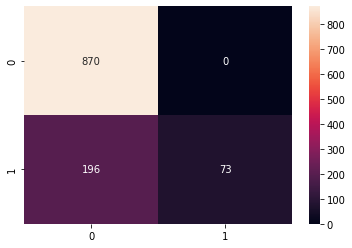

In [37]:
generate_accuracy_and_heatmap(clf_rf, X_test_features, Y_test)